In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import altair as alt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from collections import defaultdict

In [2]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [3]:
PATH = './final_df.csv'

In [ ]:
#PER FARE I GRAFICI CON ALTAIR

#df = pd.read_csv(PATH, sep=";", index_col=None)
#df.head()

#alt.Chart(df).mark_line().encode(
#    x='date_chart:T',
#    y='mean(valence):Q'
#)

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv(PATH, sep=";", parse_dates=True, index_col='date_chart', date_parser=dateparse)
df.head()

C:\Users\PC_CASA\anaconda3\envs\env_master\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (12,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-4-cfad32c85675>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,original_song_name,original_artists_name,curr_rank,tag_fimi,publisher,album_release_date,album_type,song_name,album_id,artists_names,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_id
date_chart,,,,,,,,,,,,,,,,,,,,,
2006-05-07,svegliarsi la mattina,zero assoluto,1,sgo,NaN,2006-02-28,single,Svegliarsi la mattina,6d1AvZ3brZ9caD2cFbIbbd,['Zero Assoluto'],...,0.607,171.97,audio_features,1ecMdfIXNksJTymYlzsFZ3,https://api.spotify.com/v1/tracks/1ecMdfIXNksJ...,https://api.spotify.com/v1/audio-analysis/1ecM...,223053,4.0,NaN,NaN
2006-05-14,svegliarsi la mattina,zero assoluto,3,sgo,NaN,2006-02-28,single,Svegliarsi la mattina,6d1AvZ3brZ9caD2cFbIbbd,['Zero Assoluto'],...,0.607,171.97,audio_features,1ecMdfIXNksJTymYlzsFZ3,https://api.spotify.com/v1/tracks/1ecMdfIXNksJ...,https://api.spotify.com/v1/audio-analysis/1ecM...,223053,4.0,NaN,NaN
2006-05-21,svegliarsi la mattina,zero assoluto,3,sgo,NaN,2006-02-28,single,Svegliarsi la mattina,6d1AvZ3brZ9caD2cFbIbbd,['Zero Assoluto'],...,0.607,171.97,audio_features,1ecMdfIXNksJTymYlzsFZ3,https://api.spotify.com/v1/tracks/1ecMdfIXNksJ...,https://api.spotify.com/v1/audio-analysis/1ecM...,223053,4.0,NaN,NaN
2006-05-28,svegliarsi la mattina,zero assoluto,4,sgo,NaN,2006-02-28,single,Svegliarsi la mattina,6d1AvZ3brZ9caD2cFbIbbd,['Zero Assoluto'],...,0.607,171.97,audio_features,1ecMdfIXNksJTymYlzsFZ3,https://api.spotify.com/v1/tracks/1ecMdfIXNksJ...,https://api.spotify.com/v1/audio-analysis/1ecM...,223053,4.0,NaN,NaN
2006-06-04,svegliarsi la mattina,zero assoluto,4,sgo,NaN,2006-02-28,single,Svegliarsi la mattina,6d1AvZ3brZ9caD2cFbIbbd,['Zero Assoluto'],...,0.607,171.97,audio_features,1ecMdfIXNksJTymYlzsFZ3,https://api.spotify.com/v1/tracks/1ecMdfIXNksJ...,https://api.spotify.com/v1/audio-analysis/1ecM...,223053,4.0,NaN,NaN


**Variabili

In [5]:
valence, danceability, duration, energy, loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo  = df['valence'], df['danceability'], df['duration'], df['energy'], df['loudness'], df['mode'], df['speechiness'], df['acousticness'], df['instrumentalness'], df['liveness'], df['tempo']
                                                                                                                         

valence = valence.resample("M").mean()
danceability = danceability.resample("M").mean()
duration = duration.resample("M").mean()
energy = energy.resample("M").mean()
loudness = loudness.resample("M").mean()
mode = mode.resample("M").mean()
speechiness = speechiness.resample("M").mean()
acousticness = acousticness.resample("M").mean()
instrumentalness = instrumentalness.resample("M").mean()
liveness = liveness.resample("M").mean()
tempo = tempo.resample("M").mean() 

**Filter only the Covid's period and from 2012 to today

In [6]:
covid_time = df.loc[df.index > '2019-03-01']

In [7]:
covid_valence, covid_danceability, covid_duration, covid_energy, covid_loudness, covid_mode, covid_speechiness, covid_acousticness, covid_instrumentalness, covid_liveness, covid_tempo  = covid_time['valence'], covid_time['danceability'], covid_time['duration'], covid_time['energy'], covid_time['loudness'], covid_time['mode'], covid_time['speechiness'], covid_time['acousticness'], covid_time['instrumentalness'], covid_time['liveness'], covid_time['tempo']

covid_valence = covid_valence.resample("M").mean()
covid_danceability = covid_danceability.resample("M").mean()
covid_duration = covid_duration.resample("M").mean()
covid_energy = covid_energy.resample("M").mean()
covid_loudness = covid_loudness.resample("M").mean()
covid_mode = covid_mode.resample("M").mean()
covid_speechiness = covid_speechiness.resample("M").mean()
covid_acousticness = covid_acousticness.resample("M").mean()
covid_instrumentalness = covid_instrumentalness.resample("M").mean()
covid_liveness = covid_liveness.resample("M").mean()
covid_tempo = covid_tempo.resample("M").mean()

**Dal 2012 al 2021

In [8]:
count_time = df.loc[(df.index > '2012-01-01') & (df.index < '2021-01-01')]

# Explicit

In [9]:
explicit = count_time['explicit']

explicit = explicit.resample("M").sum()

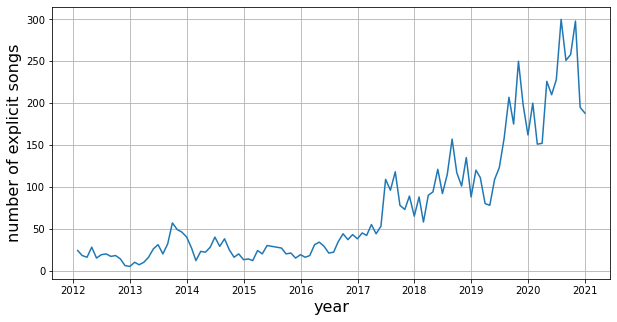

In [163]:
fix, ax = plt.subplots(figsize=(10,5))
ax.plot(explicit.index, explicit)

ax.grid(True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('number of explicit songs', fontsize=16)

#plt.legend(fontsize=14, loc='best')

plt.show()

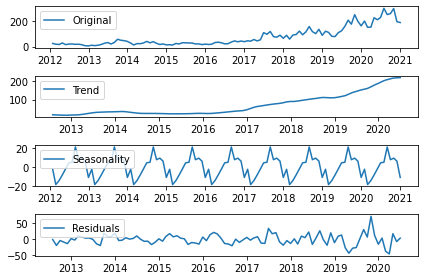

In [11]:
decomposition = seasonal_decompose(explicit)

trend_explicit = decomposition.trend
seasonal_explicit = decomposition.seasonal
residual_explicit = decomposition.resid

plt.subplot(411)
plt.plot(explicit, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_explicit, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_explicit,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_explicit, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0, 0.5, 'number of explicit songs')

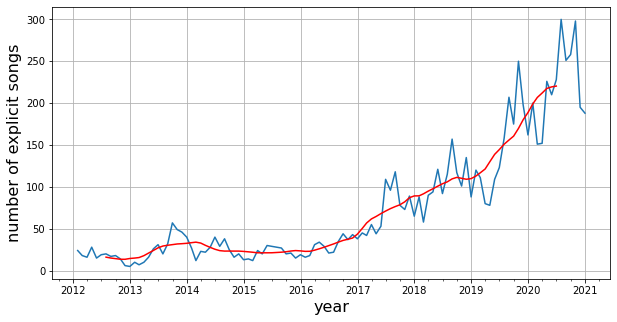

In [164]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(explicit.index, explicit)
plt.plot(trend_explicit.index, trend_explicit, c='red')
#plt.plot(covid_val.index, covid_val, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('number of explicit songs', fontsize=16)


# Duration

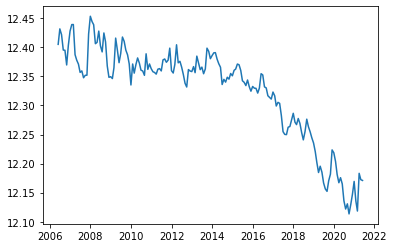

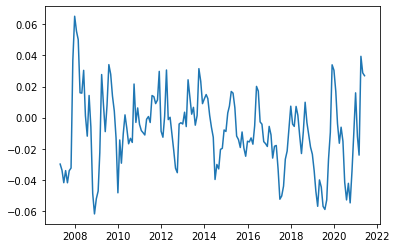

In [85]:
duration_log = pd.Series(np.log(duration), index=duration.index)
window = 12
ts_log_mov_diff = pd.Series(duration_log - duration_log.rolling(window, center=False).mean(), index=danceability.index)

plt.plot(duration_log)
plt.show()

plt.plot(ts_log_mov_diff)
plt.show()

In [ ]:
lag_acf = acf(duration, nlags=20)
lag_pacf = pacf(duration, nlags=20, method='ols')

plot_acf(ts_log_mov_diff.values[11:], lags=20, alpha=1)
plt.show()

plot_pacf(ts_log_mov_diff.values[11:], lags=20, alpha=1)
plt.show()

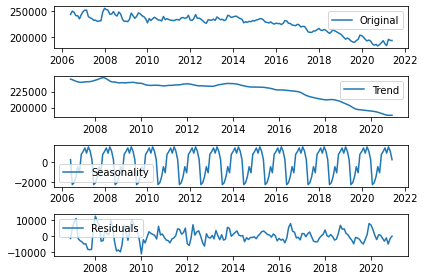

In [14]:
decomposition = seasonal_decompose(duration)

trend_duration = decomposition.trend
seasonal_duration = decomposition.seasonal
residual_duration = decomposition.resid

plt.subplot(411)
plt.plot(duration, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_duration, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_duration,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_duration, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

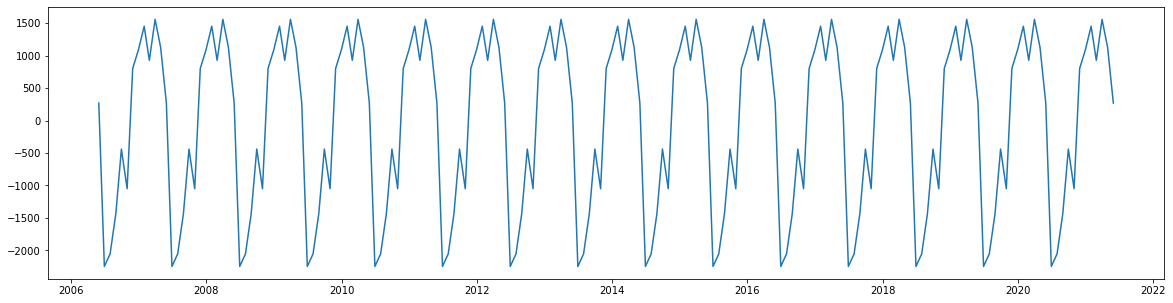

In [15]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(duration.index, seasonal_duration)
plt.show()

Text(0, 0.5, 'duration')

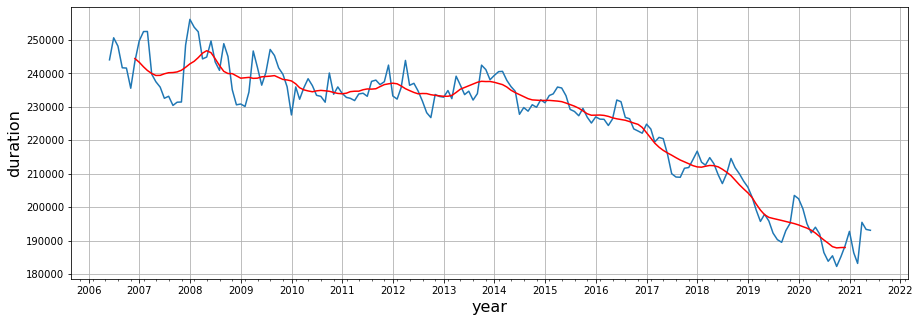

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(duration.index, duration)
plt.plot(trend_duration.index, trend_duration, c='red')
#plt.plot(covid_val.index, covid_val, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('duration', fontsize=16)

# Valence

In [ ]:
valence_log = pd.Series(np.log(valence), index=valence.index)
plt.plot(valence_log)
plt.show()

In [ ]:
window = 12

ts_log_mov_diff = pd.Series(valence_log - valence_log.rolling(window, center=False).mean(), index=valence.index)

plt.plot(ts_log_mov_diff)
plt.show()

In [ ]:
lag_acf = acf(valence, nlags=20)
lag_pacf = pacf(valence, nlags=20, method='ols')

In [ ]:
plot_acf(ts_log_mov_diff.values[11:], lags=20, alpha=1)
plt.show()

In [ ]:
plot_pacf(ts_log_mov_diff.values[11:], lags=20, alpha=1)
plt.show()

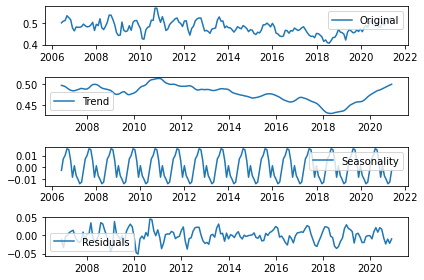

In [17]:
decomposition = seasonal_decompose(valence)

trend_valence = decomposition.trend
seasonal_valence = decomposition.seasonal
residual_valence = decomposition.resid

plt.subplot(411)
plt.plot(valence, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_valence, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_valence,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_valence, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

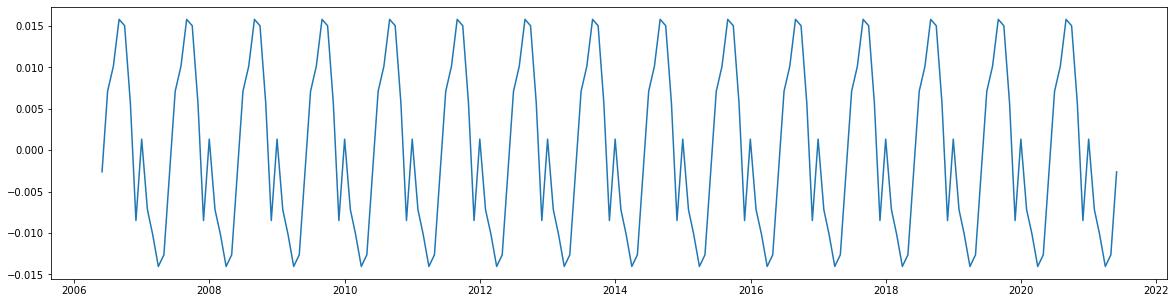

In [18]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(valence.index, seasonal_valence)
plt.show()

### Covid

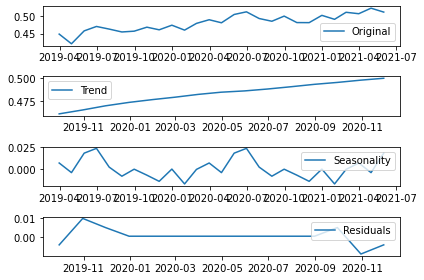

In [21]:
decomposition = seasonal_decompose(covid_valence)

trend_cov_valence = decomposition.trend
seasonal_cov_valence = decomposition.seasonal
residual_cov_valence = decomposition.resid

plt.subplot(411)
plt.plot(covid_valence, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_valence, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_valence,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_valence, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

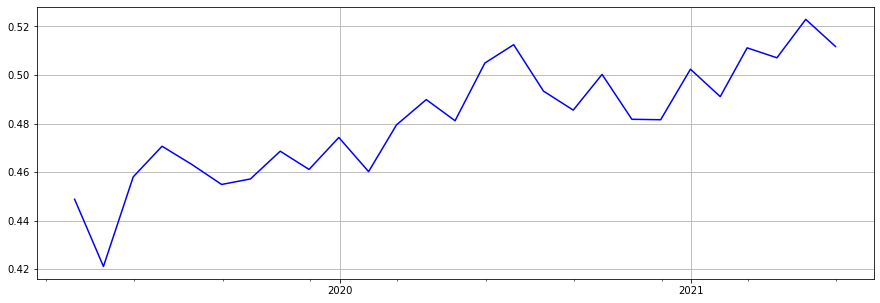

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(covid_valence.index, covid_valence, c='blue')

### GRAFICO FINALE VALENCE

Text(0, 0.5, 'valence')

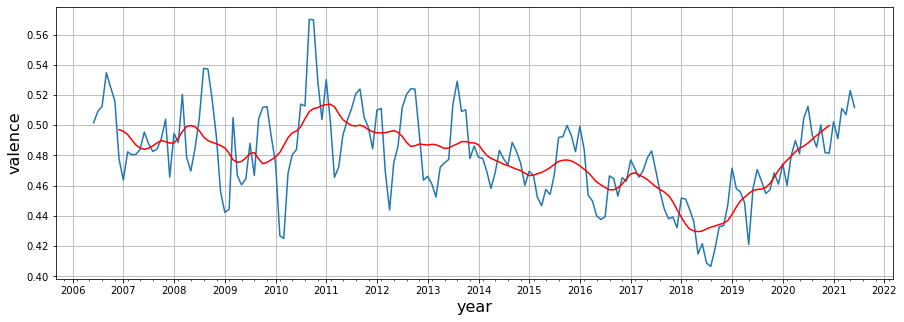

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(valence.index, valence)
plt.plot(trend_valence.index, trend_valence, c='red')
#plt.plot(covid_valence.index, covid_valence, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('valence', fontsize=16)

## Danceability

In [ ]:
danceability_log = pd.Series(np.log(danceability), index=danceability.index)
window = 12
ts_log_mov_diff = pd.Series(danceability_log - danceability_log.rolling(window, center=False).mean(), index=danceability.index)

plt.plot(danceability_log)
plt.show()

plt.plot(ts_log_mov_diff)
plt.show()

In [ ]:
lag_acf = acf(danceability, nlags=20)
lag_pacf = pacf(danceability, nlags=20, method='ols')

plot_acf(ts_log_mov_diff.values[11:], lags=20, alpha=1)
plt.show()

plot_pacf(ts_log_mov_diff.values[11:], lags=20, alpha=1)
plt.show()

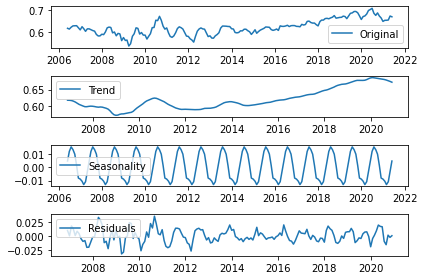

In [24]:
decomposition = seasonal_decompose(danceability)

trend_danceability = decomposition.trend
seasonal_danceability = decomposition.seasonal
residual_danceability = decomposition.resid

plt.subplot(411)
plt.plot(danceability, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_danceability, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_danceability,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_danceability, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

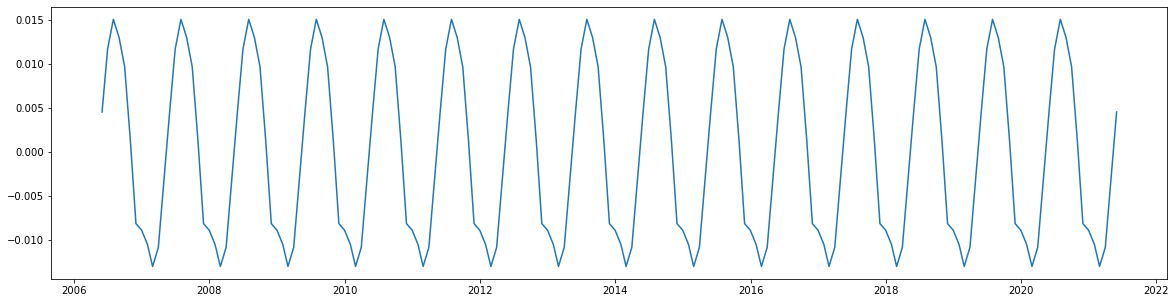

In [25]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(danceability.index, seasonal_danceability)
plt.show()

### Covid

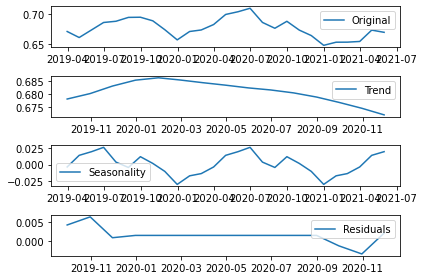

In [26]:
decomposition = seasonal_decompose(covid_danceability)

trend_cov_danceability = decomposition.trend
seasonal_cov_danceability = decomposition.seasonal
residual_cov_danceability = decomposition.resid

plt.subplot(411)
plt.plot(covid_danceability, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_danceability, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_danceability,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_danceability, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### Grafico

Text(0, 0.5, 'danceability')

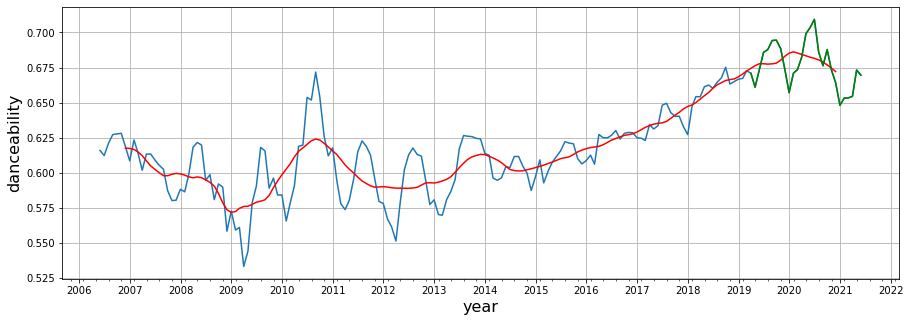

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(danceability.index, danceability)
plt.plot(trend_danceability.index, trend_danceability, c='red')
plt.plot(covid_danceability.index, covid_danceability, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('danceability', fontsize=16)

# Energy

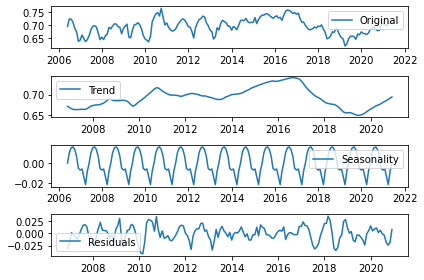

In [28]:
decomposition = seasonal_decompose(energy)

trend_energy = decomposition.trend
seasonal_energy = decomposition.seasonal
residual_energy = decomposition.resid

plt.subplot(411)
plt.plot(energy, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_energy, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_energy,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_energy, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

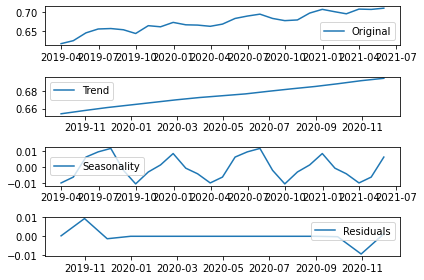

In [29]:
decomposition = seasonal_decompose(covid_energy)

trend_cov_energy = decomposition.trend
seasonal_cov_energy = decomposition.seasonal
residual_cov_energy = decomposition.resid

plt.subplot(411)
plt.plot(covid_energy, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_energy, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_energy,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_energy, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Energy grafico

Text(0, 0.5, 'energy')

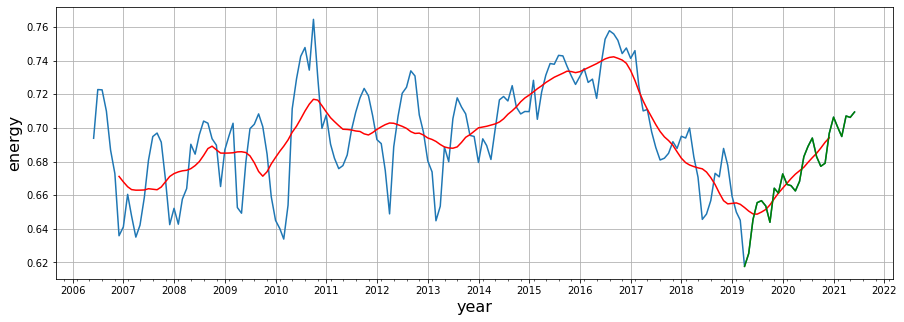

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(energy.index, energy)
plt.plot(trend_energy.index, trend_energy, c='red')
plt.plot(covid_energy.index, covid_energy, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('energy', fontsize=16)

# Loudness

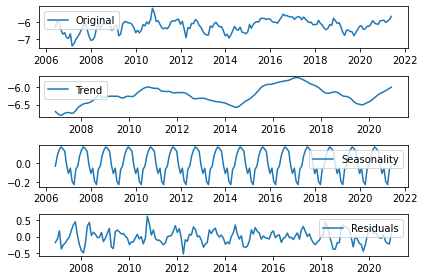

In [31]:
decomposition = seasonal_decompose(loudness)

trend_loudness = decomposition.trend
seasonal_loudness = decomposition.seasonal
residual_loudness = decomposition.resid

plt.subplot(411)
plt.plot(loudness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_loudness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_loudness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_loudness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

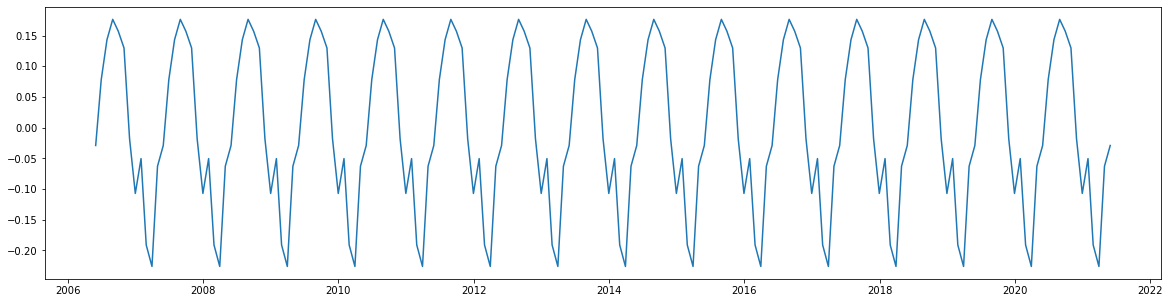

In [32]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(loudness.index, seasonal_loudness)
plt.show()

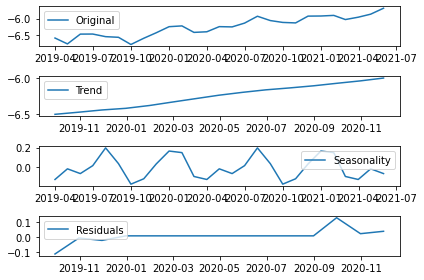

In [33]:
decomposition = seasonal_decompose(covid_loudness)

trend_cov_loudness = decomposition.trend
seasonal_cov_loudness = decomposition.seasonal
residual_cov_loudness = decomposition.resid

plt.subplot(411)
plt.plot(covid_loudness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_loudness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_loudness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_loudness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0, 0.5, 'loudness')

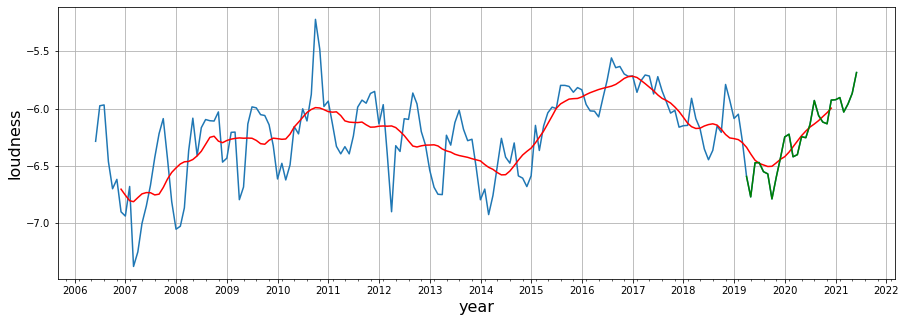

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(loudness.index, loudness)
plt.plot(trend_loudness.index, trend_loudness, c='red')
plt.plot(covid_loudness.index, covid_loudness, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('loudness', fontsize=16)

# Mode

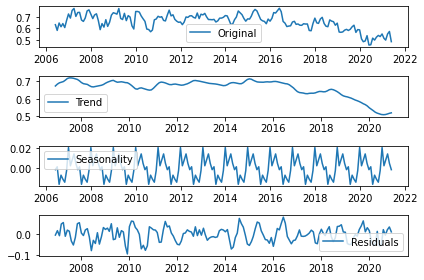

In [35]:
decomposition = seasonal_decompose(mode)

trend_mode = decomposition.trend
seasonal_mode = decomposition.seasonal
residual_mode = decomposition.resid

plt.subplot(411)
plt.plot(mode, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_mode, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_mode,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_mode, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

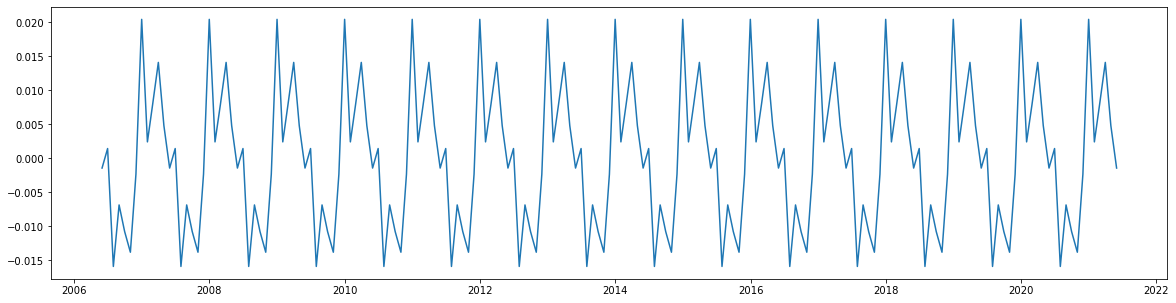

In [36]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(mode.index, seasonal_mode)
plt.show()

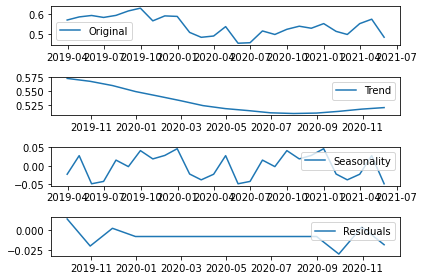

In [37]:
decomposition = seasonal_decompose(covid_mode)

trend_cov_mode = decomposition.trend
seasonal_cov_mode = decomposition.seasonal
residual_cov_mode = decomposition.resid

plt.subplot(411)
plt.plot(covid_mode, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_mode, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_mode,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_mode, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0, 0.5, 'mode')

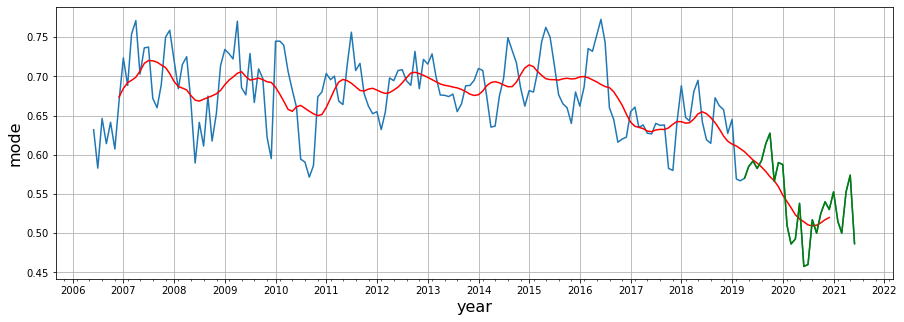

In [38]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(mode.index, mode)
plt.plot(trend_mode.index, trend_mode, c='red')
plt.plot(covid_mode.index, covid_mode, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('mode', fontsize=16)

# Speechiness

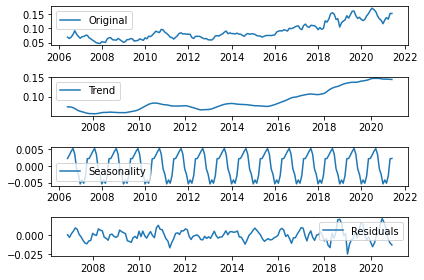

In [39]:
decomposition = seasonal_decompose(speechiness)

trend_speechiness = decomposition.trend
seasonal_speechiness = decomposition.seasonal
residual_speechiness = decomposition.resid

plt.subplot(411)
plt.plot(speechiness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_speechiness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_speechiness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_speechiness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

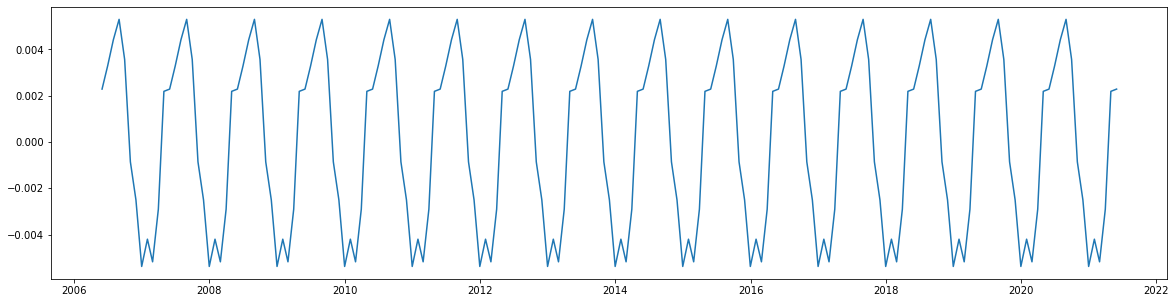

In [40]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(speechiness.index, seasonal_speechiness)
plt.show()

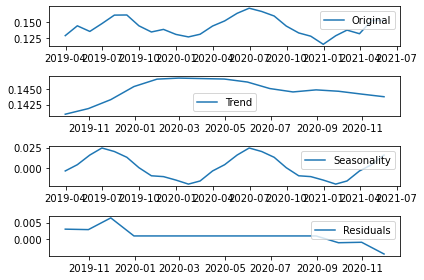

In [41]:
decomposition = seasonal_decompose(covid_speechiness)

trend_cov_speechiness = decomposition.trend
seasonal_cov_speechiness = decomposition.seasonal
residual_cov_speechiness = decomposition.resid

plt.subplot(411)
plt.plot(covid_speechiness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_speechiness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_speechiness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_speechiness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0, 0.5, 'speechiness')

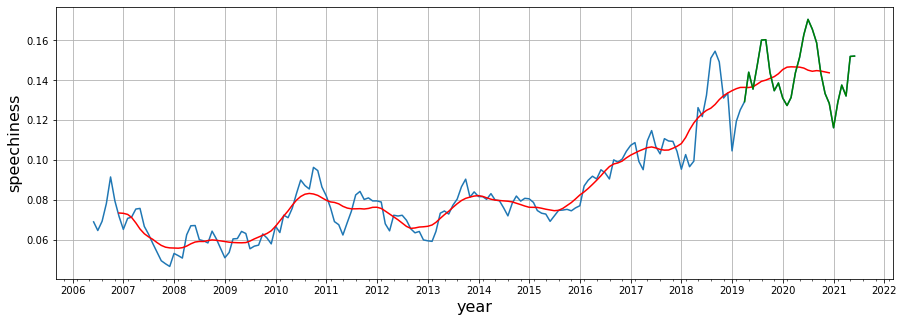

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
#year_format = mdates.DateFormatter('%Y')
#month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

#ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
#ax.xaxis.set_major_formatter(year_format)

plt.plot(speechiness.index, speechiness)
plt.plot(trend_speechiness.index, trend_speechiness, c='red')
plt.plot(covid_speechiness.index, covid_speechiness, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('speechiness', fontsize=16)

# Acousticness

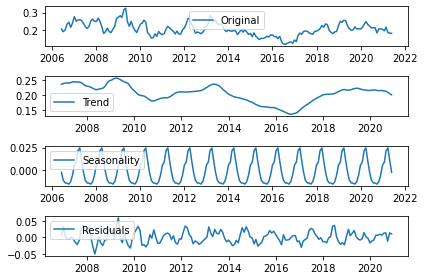

In [48]:
decomposition = seasonal_decompose(acousticness)

trend_acousticness = decomposition.trend
seasonal_acousticness = decomposition.seasonal
residual_acousticness = decomposition.resid

plt.subplot(411)
plt.plot(acousticness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_acousticness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_acousticness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_acousticness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

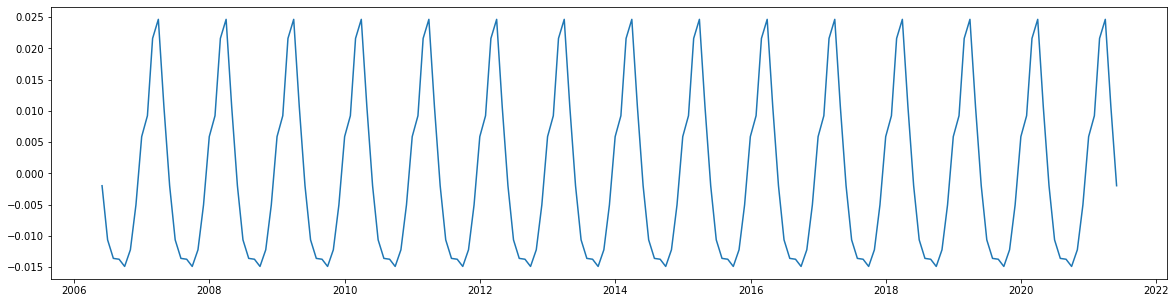

In [49]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(acousticness.index, seasonal_acousticness)
plt.show()

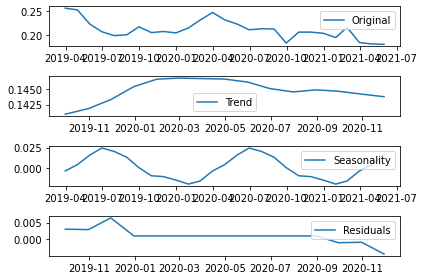

In [50]:
decomposition = seasonal_decompose(covid_speechiness)

trend_cov_acousticness = decomposition.trend
seasonal_cov_acousticness = decomposition.seasonal
residual_cov_acousticness = decomposition.resid

plt.subplot(411)
plt.plot(covid_acousticness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_acousticness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_acousticness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_acousticness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0, 0.5, 'acousticness')

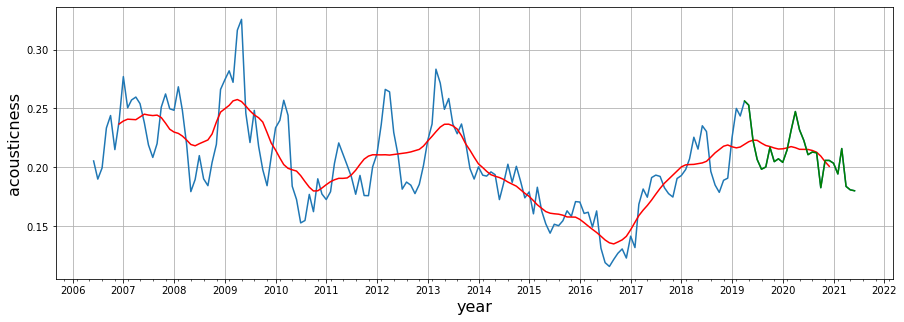

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(month)

ax.xaxis.set_major_locator(year)

plt.plot(acousticness.index, acousticness)
plt.plot(trend_acousticness.index, trend_acousticness, c='red')
plt.plot(covid_acousticness.index, covid_acousticness, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('acousticness', fontsize=16)

# Instrumentalness

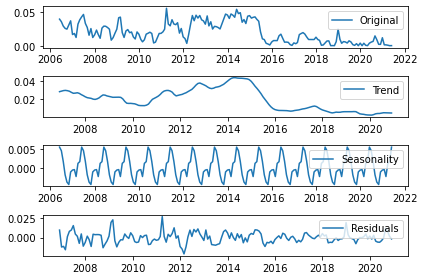

In [52]:
decomposition = seasonal_decompose(instrumentalness)

trend_instrumentalness = decomposition.trend
seasonal_instrumentalness = decomposition.seasonal
residual_instrumentalness = decomposition.resid

plt.subplot(411)
plt.plot(instrumentalness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_instrumentalness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_instrumentalness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_instrumentalness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

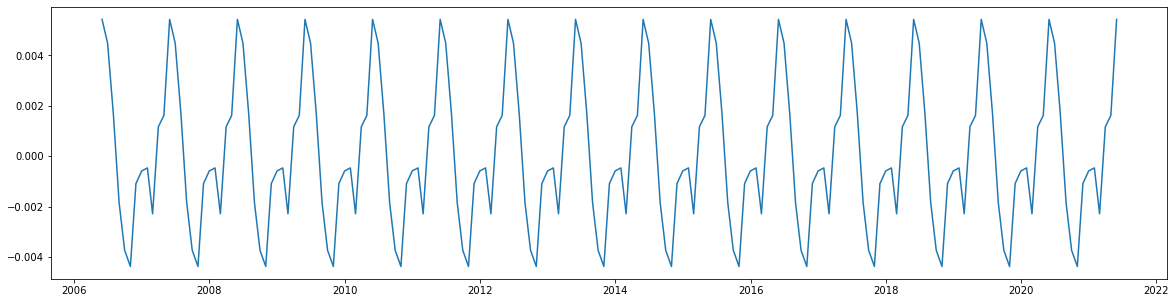

In [53]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(instrumentalness.index, seasonal_instrumentalness)
plt.show()

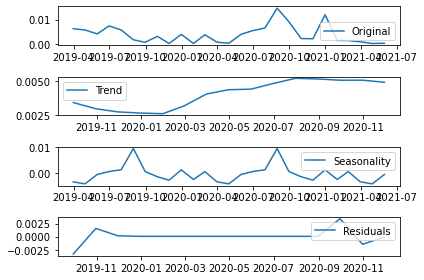

In [54]:
decomposition = seasonal_decompose(covid_instrumentalness)

trend_cov_instrumentalness = decomposition.trend
seasonal_cov_instrumentalness = decomposition.seasonal
residual_cov_instrumentalness = decomposition.resid

plt.subplot(411)
plt.plot(covid_instrumentalness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_instrumentalness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_instrumentalness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_instrumentalness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0, 0.5, 'instrumentalness')

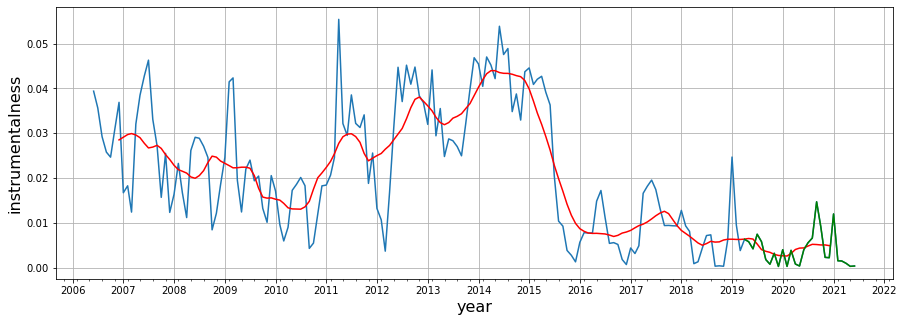

In [55]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(month)

ax.xaxis.set_major_locator(year)

plt.plot(instrumentalness.index, instrumentalness)
plt.plot(trend_instrumentalness.index, trend_instrumentalness, c='red')
plt.plot(covid_instrumentalness.index, covid_instrumentalness, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('instrumentalness', fontsize=16)

# Liveness

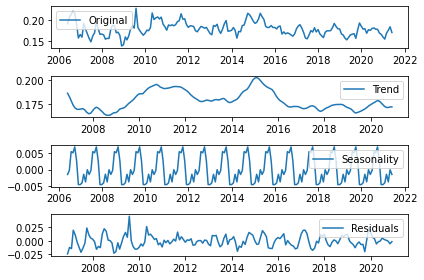

In [56]:
decomposition = seasonal_decompose(liveness)

trend_liveness = decomposition.trend
seasonal_liveness = decomposition.seasonal
residual_liveness = decomposition.resid

plt.subplot(411)
plt.plot(liveness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_liveness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_liveness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_liveness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

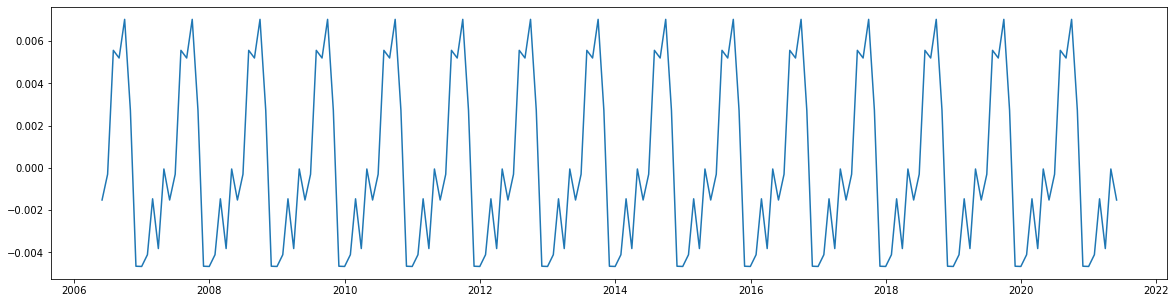

In [57]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(liveness.index, seasonal_liveness)
plt.show()

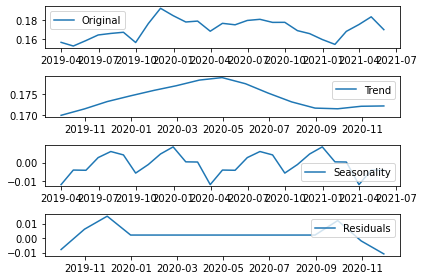

In [58]:
decomposition = seasonal_decompose(covid_liveness)

trend_cov_liveness = decomposition.trend
seasonal_cov_liveness = decomposition.seasonal
residual_cov_liveness = decomposition.resid

plt.subplot(411)
plt.plot(covid_liveness, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_liveness, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_liveness,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_liveness, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0, 0.5, 'liveness')

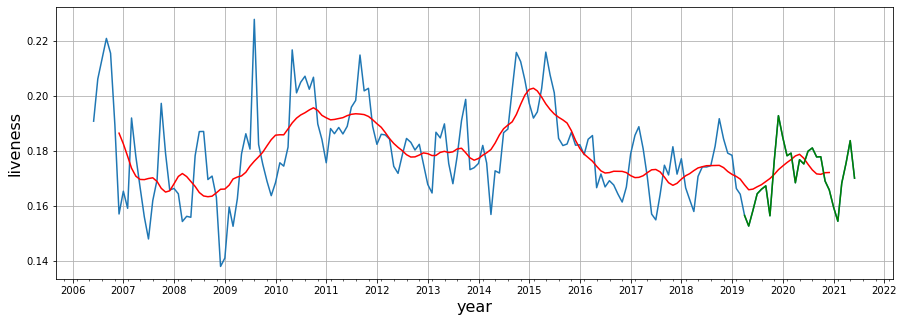

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(month)

ax.xaxis.set_major_locator(year)

plt.plot(liveness.index, liveness)
plt.plot(trend_liveness.index, trend_liveness, c='red')
plt.plot(covid_liveness.index, covid_liveness, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('liveness', fontsize=16)

# Tempo

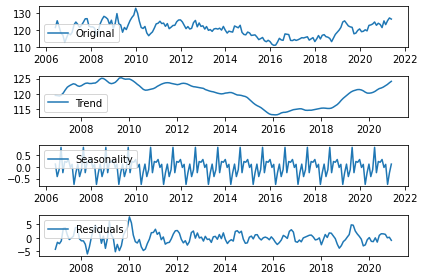

In [60]:
decomposition = seasonal_decompose(tempo)

trend_tempo = decomposition.trend
seasonal_tempo = decomposition.seasonal
residual_tempo = decomposition.resid

plt.subplot(411)
plt.plot(tempo, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_tempo, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_tempo,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_tempo, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

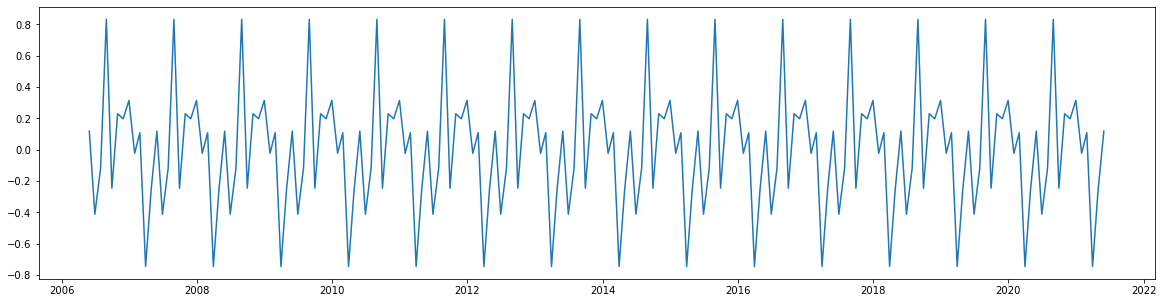

In [61]:
fix, ax = plt.subplots(figsize=(20,5))
ax.plot(tempo.index, seasonal_tempo)
plt.show()

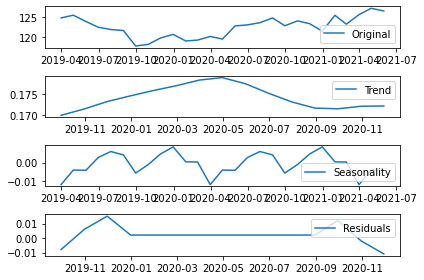

In [100]:
decomposition = seasonal_decompose(covid_liveness)

trend_cov_tempo = decomposition.trend
seasonal_cov_tempo = decomposition.seasonal
residual_cov_tempo = decomposition.resid

plt.subplot(411)
plt.plot(covid_tempo, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_cov_tempo, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_cov_tempo,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_cov_tempo, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

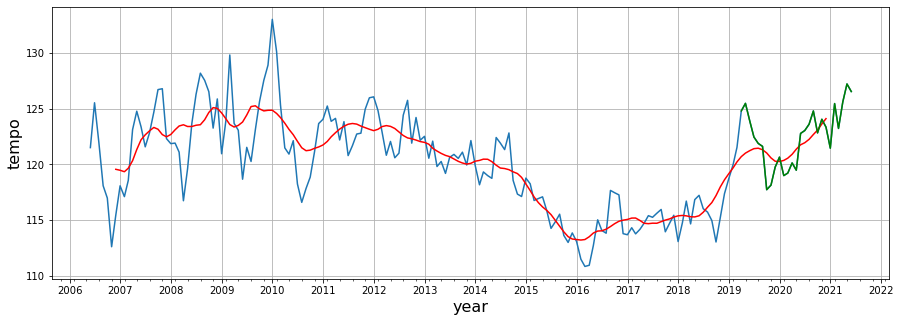

In [166]:
fig, ax = plt.subplots(figsize=(15,5))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(month)

ax.xaxis.set_major_locator(year)

plt.plot(tempo.index, tempo)
plt.plot(trend_tempo.index, trend_tempo, c='red')
plt.plot(covid_tempo.index, covid_tempo, c='green')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('year', fontsize=16)
plt.ylabel('tempo', fontsize=16)


# GRAFICI

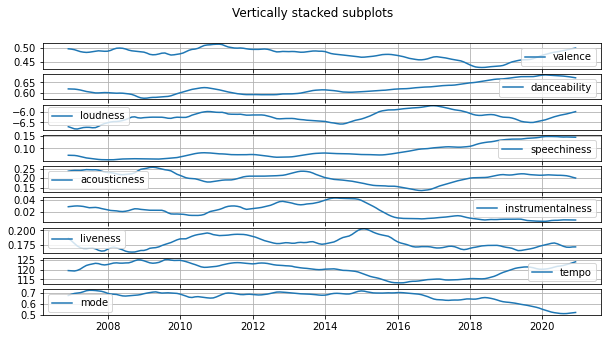

In [140]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(9, sharex=False, figsize=(10,5))

ax1.grid(True)

fig.suptitle('Vertically stacked subplots')

ax1.plot(trend_valence, label="valence")
ax1.grid(True)
ax1.legend()

ax2.plot(trend_danceability, label='danceability')
ax2.grid(True)
ax2.legend()

ax3.plot(trend_loudness, label='loudness')
ax3.grid(True)
ax3.legend()

ax4.plot(trend_speechiness, label='speechiness')
ax4.grid(True)
ax4.legend()

ax5.plot(trend_acousticness, label='acousticness')
ax5.grid(True)
ax5.legend()

ax6.plot(trend_instrumentalness, label='instrumentalness')
ax6.grid(True)
ax6.legend()

ax7.plot(trend_liveness, label='liveness')
ax7.grid(True)
ax7.legend()

ax8.plot(trend_tempo, label='tempo')
ax8.grid(True)
ax8.legend()

ax9.plot(trend_mode, label='mode')
ax9.grid(True)
ax9.legend()

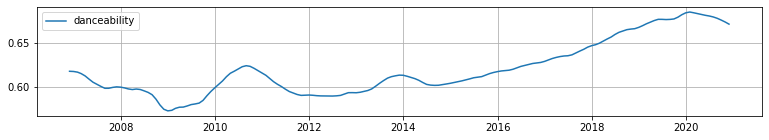

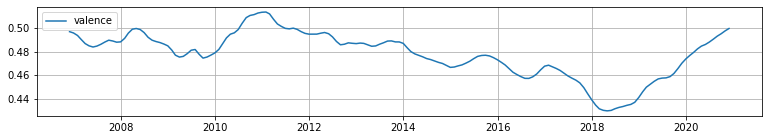

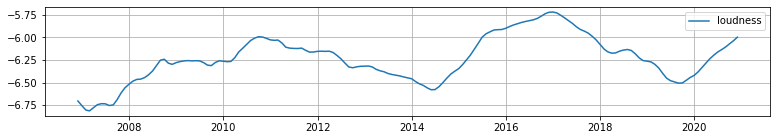

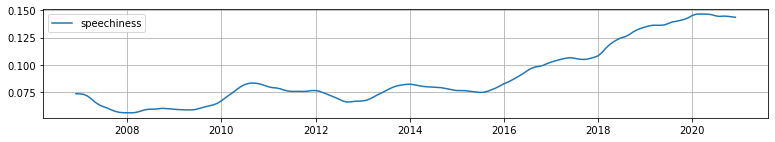

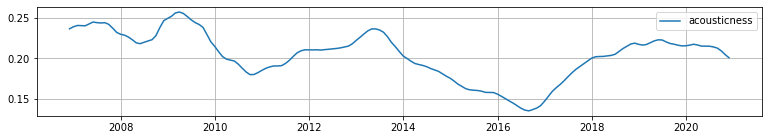

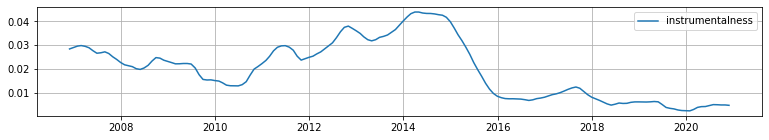

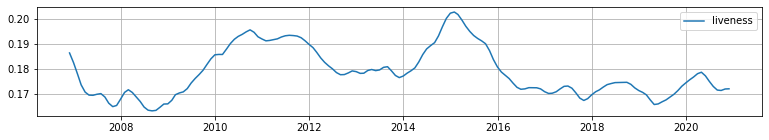

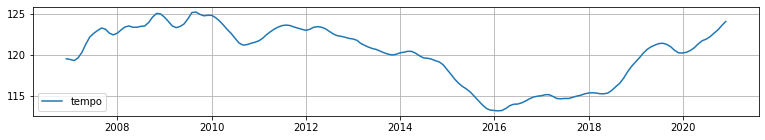

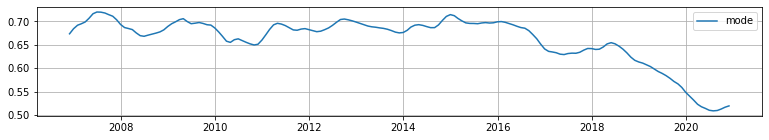

In [119]:
fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_danceability, label='danceability')
plt.legend(loc='best')

fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_valence, label='valence')
plt.legend(loc='best')

fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_loudness, label='loudness')
plt.legend(loc='best')

fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_speechiness, label='speechiness')
plt.legend(loc='best')

fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_acousticness, label='acousticness')
plt.legend(loc='best')

fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_instrumentalness, label='instrumentalness')
plt.legend(loc='best')

fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_liveness, label='liveness')
plt.legend(loc='best')

fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_tempo, label='tempo')
plt.legend(loc='best')

fig, ax = plt.subplots(figsize=(13,2))
ax.grid(True)
plt.plot(trend_mode, label='mode')
plt.legend(loc='best')

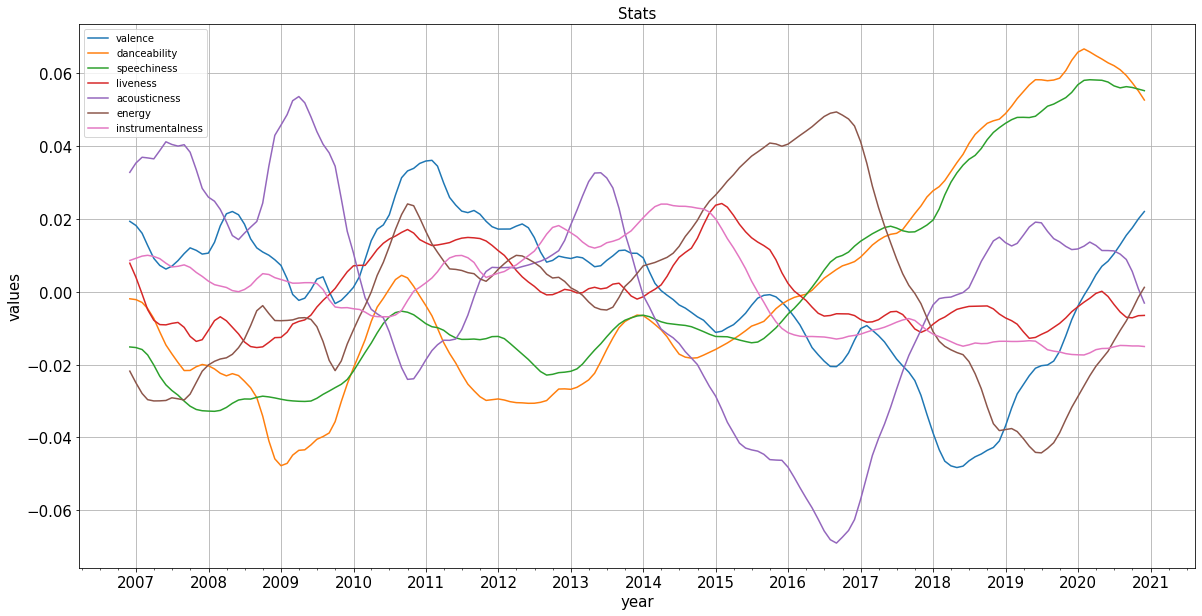

In [173]:
fig, ax = plt.subplots(figsize=(20,10))
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(month)
ax.xaxis.set_major_locator(year)

plt.plot(trend_valence - trend_valence.mean(), label="valence")
plt.plot(trend_danceability - trend_danceability.mean(), label="danceability")
plt.plot(trend_speechiness - trend_speechiness.mean(), label="speechiness")
plt.plot(trend_liveness - trend_liveness.mean(), label="liveness")
plt.plot(trend_acousticness - trend_acousticness.mean(), label="acousticness")
plt.plot(trend_energy - trend_energy.mean(), label="energy")
plt.plot(trend_instrumentalness - trend_instrumentalness.mean(), label="instrumentalness")

#plt.plot(trend_mode - trend_mode.mean(), label="mode")
#plt.plot(trend_loudness - trend_loudness.mean(), label="loudness")
#plt.plot(trend_tempo - trend_tempo.mean(), label="tempo")
#plt.plot(trend_explicit - trend_explicit.mean(), label="explicit")
#plt.plot(trend_duration - trend_duration.mean(), label="duration")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc='best')

ax.set_title("Stats", fontsize=15)
ax.set_xlabel("year", fontsize=15)
ax.set_ylabel("values", fontsize=15)

#plt.savefig("stats.png", dpi=300)

plt.show()